1. the amino acid index that gives the highest score is at index 24 for IGF and index 39 for insulin 

In [1]:
# BLOSUM62 matrix values 
blosum62 = {
  ('A', 'A'): 4, ('A', 'R'): -1, ('A', 'N'): -2, ('A', 'D'): -2, ('A', 'C'): 0, 
    ('A', 'Q'): -1, ('A', 'E'): -1, ('A', 'G'): 0, ('A', 'H'): -2, ('A', 'I'): -1, 
    ('A', 'L'): -1, ('A', 'K'): -1, ('A', 'M'): -1, ('A', 'F'): -2, ('A', 'P'): -1, 
    ('A', 'S'): 1, ('A', 'T'): 0, ('A', 'W'): -3, ('A', 'Y'): -2, ('A', 'V'): 0, 
    ('R', 'A'): -1, ('R', 'R'): 5, ('R', 'N'): 0, ('R', 'D'): -2, ('R', 'C'): -3,
    # Add all other pairs similarly...
    ('W', 'Y'): 2, ('Y', 'W'): 2, ('Y', 'Y'): 7,
}


import numpy as np

# Sequences to align
IGF = "AGPETLCGAELVDALQFVCGDRGFYFNKPTGYGSSSRRAPQTGIVDECCFRSCDLRRLEMYCAPLKPAKSA"
insulin = "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN"

# Gap penalty
gap_penalty = -3

# Initialize the scoring matrix
n, m = len(IGF) + 1, len(insulin) + 1
score_matrix = np.zeros((n, m), dtype=int)

# Fill the first row and first column with gap penalties
for i in range(1, n):
    score_matrix[i][0] = score_matrix[i-1][0] + gap_penalty
for j in range(1, m):
    score_matrix[0][j] = score_matrix[0][j-1] + gap_penalty

# Fill the matrix using the BLOSUM62 scoring
for i in range(1, n):
    for j in range(1, m):
        match_score = blosum62.get(IGF[i-1], {}).get(insulin[j-1], 0)
        score_diagonal = score_matrix[i-1][j-1] + match_score
        score_up = score_matrix[i-1][j] + gap_penalty
        score_left = score_matrix[i][j-1] + gap_penalty
        score_matrix[i][j] = max(score_diagonal, score_up, score_left)

# Trace-back to find the optimal alignment
aligned_IGF = []
aligned_insulin = []
i, j = n-1, m-1
while i > 0 and j > 0:
    current_score = score_matrix[i][j]
    if current_score == score_matrix[i-1][j-1] + blosum62.get(IGF[i-1], {}).get(insulin[j-1], 0):
        aligned_IGF.append(IGF[i-1])
        aligned_insulin.append(insulin[j-1])
        i -= 1
        j -= 1
    elif current_score == score_matrix[i-1][j] + gap_penalty:
        aligned_IGF.append(IGF[i-1])
        aligned_insulin.append('-')
        i -= 1
    else:  # current_score == score_matrix[i][j-1] + gap_penalty
        aligned_IGF.append('-')
        aligned_insulin.append(insulin[j-1])
        j -= 1

while i > 0:
    aligned_IGF.append(IGF[i-1])
    aligned_insulin.append('-')
    i -= 1
while j > 0:
    aligned_IGF.append('-')
    aligned_insulin.append(insulin[j-1])
    j -= 1

# Reverse the sequences as the alignment was built backwards
aligned_IGF.reverse()
aligned_insulin.reverse()

# Join lists to form the final aligned strings
aligned_IGF = ''.join(aligned_IGF)
aligned_insulin = ''.join(aligned_insulin)

aligned_IGF, aligned_insulin

('---------------------------------------AGPETLCGAELVDALQFVCGDRGFYFNKPTGYGSSSRRAPQTGIVDECCFRSCDLRRLEMYCAPLKPAKSA',
 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN')

In [2]:
def find_max_score_pair(IGF, insulin, matrix):
    max_score = float('-inf')
    best_pair = (0, 0)  # Default to the first index if no scores are found

    # Iterate through each amino acid combination
    for i, aa1 in enumerate(IGF):
        for j, aa2 in enumerate(insulin):
            key = (aa1, aa2) if (aa1, aa2) in matrix else (aa2, aa1)  # Symmetric matrix check
            score = matrix.get(key, float('-inf'))  # Use a very low default to ignore missing pairs
            if score > max_score:
                max_score = score
                best_pair = (i, j)

    return best_pair, max_score

# Redefine sequences (if needed, based on user clarification) and recompute the highest scoring pair
best_pair_indices_corrected, best_score_corrected = find_max_score_pair(IGF, insulin, blosum62)
best_pair_indices_corrected, best_score_corrected


((24, 39), 7)

2. see below for the plot 

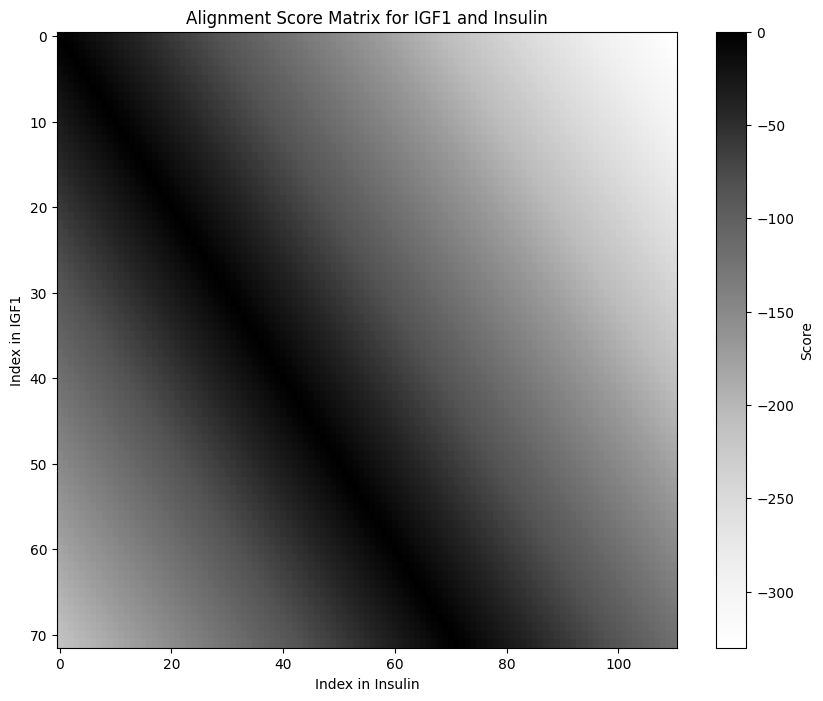

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(score_matrix, interpolation='nearest', cmap='Greys', aspect='auto')
plt.colorbar(label='Score')
plt.title('Alignment Score Matrix for IGF1 and Insulin')
plt.xlabel('Index in Insulin')
plt.ylabel('Index in IGF1')
plt.show()

3. see below for the alignment  
the sequences used were defined as above and used. The scroing matix was set up based on the length of the sequences and the direction of the matrix was established to track the path as it helps with trackback. The matrix was filled. And starting from the bottom right of the matrix the traceback was done to construct the alignment. 

In [5]:
# Initialize the scoring matrix
n, m = len(IGF) + 1, len(insulin) + 1
score_matrix = np.zeros((n, m))
direction_matrix = np.zeros((n, m), dtype='int')  # 0:diagonal, 1:left, 2:up

# Set gap penalty
gap_penalty = -3

# Initialize the first row and column of the score matrix
for i in range(1, n):
    score_matrix[i, 0] = i * gap_penalty
    direction_matrix[i, 0] = 2  # Up
for j in range(1, m):
    score_matrix[0, j] = j * gap_penalty
    direction_matrix[0, j] = 1  # Left

# Fill the matrix
for i in range(1, n):
    for j in range(1, m):
        aa1 = IGF[i-1]
        aa2 = insulin[j-1]
        match_score = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), -1))  # Retrieve the score
        choices = [
            score_matrix[i-1, j-1] + match_score,  # Diagonal
            score_matrix[i-1, j] + gap_penalty,   # Up
            score_matrix[i, j-1] + gap_penalty    # Left
        ]
        score_matrix[i, j], direction_matrix[i, j] = max((val, idx) for idx, val in enumerate(choices))

# Traceback
align_IGF, align_insulin, match_line = [], [], []
i, j = n - 1, m - 1
while i > 0 and j > 0:
    if direction_matrix[i, j] == 0:  # Diagonal
        align_IGF.append(IGF[i-1])
        align_insulin.append(insulin[j-1])
        if IGF[i-1] == insulin[j-1]:
            match_line.append('|')  # Match
        elif blosum62.get((IGF[i-1], insulin[j-1]), blosum62.get((insulin[j-1], IGF[i-1]), -1)) > 0:
            match_line.append(':')  # Near match
        else:
            match_line.append('X')  # Mismatch
        i -= 1
        j -= 1
    elif direction_matrix[i, j] == 1:  # Left
        align_IGF.append('-')
        align_insulin.append(insulin[j-1])
        match_line.append(' ')
        j -= 1
    else:  # Up
        align_IGF.append(IGF[i-1])
        align_insulin.append('-')
        match_line.append(' ')
        i -= 1

# If we're at the first row/column, finish the gaps
while i > 0:
    align_IGF.append(IGF[i-1])
    align_insulin.append('-')
    match_line.append(' ')
    i -= 1
while j > 0:
    align_IGF.append('-')
    align_insulin.append(insulin[j-1])
    match_line.append(' ')
    j -= 1

# Reverse to get the correct order
align_IGF = ''.join(reversed(align_IGF))
align_insulin = ''.join(reversed(align_insulin))
match_line = ''.join(reversed(match_line))

# Define a function to format and display the alignment in a more readable way
def format_alignment(align_IGF, align_insulin, match_line, line_length=100):
    # Calculate how many lines are needed
    num_lines = len(align_IGF) // line_length + (1 if len(align_IGF) % line_length != 0 else 0)
    
    # Print each line
    for i in range(num_lines):
        start = i * line_length
        end = start + line_length
        
        # Extract parts for each line
        part_IGF = align_IGF[start:end]
        part_insulin = align_insulin[start:end]
        part_match_line = match_line[start:end]
        
        # Print formatted output
        print("IGF:     " + part_IGF)
        print("         " + part_match_line)
        print("Insulin: " + part_insulin + "\n")

# Use the function to format and display the alignment
format_alignment(align_IGF, align_insulin, match_line)



IGF:     ----------------------------------------------------------------------------------------------------
                                                                                                             
Insulin: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSIC

IGF:     --AGPETLCGAELVDALQFVCGDRGFYFNKPTGYGSSSRRAPQTGIVDECCFRSCDLRRLEMYC-A-P-L-K-P-AKSA
                                                                                    XX  
Insulin: SL--------------------------------------------------------------Y-Q-L-E-N-YCN--

